In [1]:
# import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd

In [2]:
cd /Users/theodruilhe/Documents/documents_mac_book_air/M2_D3S/scoring3/churn_prediction

/Users/theodruilhe/Documents/documents_mac_book_air/M2_D3S/scoring3/churn_prediction


In [3]:
df = pd.read_csv("data/data.csv", delimiter=",")
df.head()

,id,gender,customer_senior,customer_partner,dependent_family,month_tenure,phone_subscription,multiple_line,internet_type,online_security,...,device_protection_plan,techinal_support,streaming_tv,streaming_movie,contract_type,paperless_billing,payment_method_type,amount_charges_monthly,amount_total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.shape)

# Get general information about each column
print(df.info())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   customer_senior         7043 non-null   int64  
 3   customer_partner        7043 non-null   object 
 4   dependent_family        7043 non-null   object 
 5   month_tenure            7043 non-null   int64  
 6   phone_subscription      7043 non-null   object 
 7   multiple_line           7043 non-null   object 
 8   internet_type           7043 non-null   object 
 9   online_security         7043 non-null   object 
 10  backup_service_online   7043 non-null   object 
 11  device_protection_plan  7043 non-null   object 
 12  techinal_support        7043 non-null   object 
 13  streaming_tv            7043 non-null   object 
 14  streaming_movie         7043 

In [5]:
# Check for any missing values
print(df.isnull().sum())

id                         0
gender                     0
customer_senior            0
customer_partner           0
dependent_family           0
month_tenure               0
phone_subscription         0
multiple_line              0
internet_type              0
online_security            0
backup_service_online      0
device_protection_plan     0
techinal_support           0
streaming_tv               0
streaming_movie            0
contract_type              0
paperless_billing          0
payment_method_type        0
amount_charges_monthly     0
amount_total_charges      11
churn                      0
dtype: int64


In [6]:
# delete the missing values for the colmumn amount_total_charges
df = df.dropna(subset=['amount_total_charges'])
print(df.shape)

(7032, 21)


In [7]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [9]:
print(df.columns)

Index(['id', 'gender', 'customer_senior', 'customer_partner',
       'dependent_family', 'month_tenure', 'phone_subscription',
       'multiple_line', 'internet_type', 'online_security',
       'backup_service_online', 'device_protection_plan', 'techinal_support',
       'streaming_tv', 'streaming_movie', 'contract_type', 'paperless_billing',
       'payment_method_type', 'amount_charges_monthly', 'amount_total_charges',
       'churn'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   customer_senior         7032 non-null   int64  
 3   customer_partner        7032 non-null   object 
 4   dependent_family        7032 non-null   object 
 5   month_tenure            7032 non-null   int64  
 6   phone_subscription      7032 non-null   object 
 7   multiple_line           7032 non-null   object 
 8   internet_type           7032 non-null   object 
 9   online_security         7032 non-null   object 
 10  backup_service_online   7032 non-null   object 
 11  device_protection_plan  7032 non-null   object 
 12  techinal_support        7032 non-null   object 
 13  streaming_tv            7032 non-null   object 
 14  streaming_movie         7032 non-null   objec

## Mapping

In [11]:
mapping_dict = {
    "gender": {
        "Male": 1,
        "Female": 0
    },
    "customer_senior": {
        1: 1,
        0: 0
    },
    "internet_type": {
        "Fiber optic": 2,
        "DSL": 1,
        "No": 0
    },
    "contract_type": {
        "Two year": 2,
        "One year": 1,
        "Month-to-month": 0
    },
    "payment_method_type": {
        "Electronic check": 3,
        "Mailed check": 2,
        "Bank transfer (automatic)": 1,
        "Credit card (automatic)": 0
    },
    "multiple_line" : {
        "Yes": 2,
        "No": 1,
        "No phone service": 0
    },
    "binary": {
        "Yes": 1,
        "No": 0
    },
    "multiple" : {
        "Yes": 2,
        "No": 1,
        "No internet service": 0
    }
}

In [12]:
df_mapped = df.copy()

for col in df_mapped:
    if col in mapping_dict.keys():
        df_mapped[col] = df_mapped[col].map(mapping_dict[col])
    else:
        if df_mapped[col].nunique() == 2:
            df_mapped[col] = df_mapped[col].map(mapping_dict["binary"])
        elif df_mapped[col].nunique() == 3:
            df_mapped[col] = df_mapped[col].map(mapping_dict["multiple"])

df_mapped

,id,gender,customer_senior,customer_partner,dependent_family,month_tenure,phone_subscription,multiple_line,internet_type,online_security,...,device_protection_plan,techinal_support,streaming_tv,streaming_movie,contract_type,paperless_billing,payment_method_type,amount_charges_monthly,amount_total_charges,churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,1,...,1,1,1,1,0,1,3,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,1,2,...,2,1,1,1,1,0,2,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,2,...,1,1,1,1,0,1,2,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,2,...,2,2,1,1,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,2,1,...,1,1,1,1,0,1,3,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,1,2,...,2,2,2,2,1,1,2,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,2,1,...,2,1,2,2,1,1,0,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,2,...,1,1,1,1,0,1,3,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,2,1,...,1,1,1,1,0,1,2,74.40,306.60,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   customer_senior         7032 non-null   int64  
 3   customer_partner        7032 non-null   object 
 4   dependent_family        7032 non-null   object 
 5   month_tenure            7032 non-null   int64  
 6   phone_subscription      7032 non-null   object 
 7   multiple_line           7032 non-null   object 
 8   internet_type           7032 non-null   object 
 9   online_security         7032 non-null   object 
 10  backup_service_online   7032 non-null   object 
 11  device_protection_plan  7032 non-null   object 
 12  techinal_support        7032 non-null   object 
 13  streaming_tv            7032 non-null   object 
 14  streaming_movie         7032 non-null   objec

# Descriptive Statistics

## Categorical variables

In [14]:
# Loop through each categorical column and plot count plots
categorical_columns = ['gender', 'customer_senior', 'customer_partner', 'dependent_family', 
                       'phone_subscription', 'multiple_line', 'internet_type', 
                       'online_security', 'backup_service_online', 'device_protection_plan', 
                       'techinal_support', 'streaming_tv', 'streaming_movie', 
                       'contract_type', 'paperless_billing', 'payment_method_type', 'churn']

import plotly.express as px

# Loop through each categorical column and create a count plot with Plotly
for col in categorical_columns:
    # Calculate counts of each category in the column
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Count']  # Rename columns for better labels
    
    # Create a Plotly bar chart
    fig = px.bar(
        counts,
        x=col,
        y='Count',
        title=f'Distribution of {col}',
        labels={col: col, 'Count': 'Count'},
        color_discrete_sequence=px.colors.sequential.Viridis
    )
    
    # Customize layout
    fig.update_layout(
        xaxis_title=col,
        yaxis_title="Count",
        title_x=0.5,  # Center title
        xaxis=dict(tickangle=-45)  # Rotate x-axis labels for better readability
    )
    
    # Show the figure
    fig.show()

## Quantitative variables

In [15]:
import plotly.express as px

# List of numerical columns
numerical_columns = ['month_tenure', 'amount_charges_monthly', 'amount_total_charges']

# Loop through each numerical column and create separate plots for histogram and box plot
for col in numerical_columns:
    # Histogram for the distribution
    fig_hist = px.histogram(
        df,
        x=col,
        nbins=30,  # Adjust number of bins as needed
        title=f'Distribution of {col}',
        labels={col: col, 'count': 'Frequency'},
        color_discrete_sequence=['#4c72b0']
    )
    fig_hist.update_layout(
        xaxis_title=col,
        yaxis_title="Frequency",
        template="plotly_white"
    )
    fig_hist.show()

    # Box plot for outlier detection
    fig_box = px.box(
        df,
        x=col,
        title=f'Outliers in {col}',
        labels={col: col},
        color_discrete_sequence=['#55a868']
    )
    fig_box.update_layout(
        xaxis_title=col,
        template="plotly_white"
    )
    fig_box.show()

# Bivariate Analysis

In [16]:
# Loop through each categorical column and plot proportions with Plotly
for col in categorical_columns:
    if col != 'churn':  # Skip 'churn' itself
        # Calculate proportions
        prop_df = df.groupby([col, 'churn']).size().unstack().fillna(0)
        prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)  # Convert counts to proportions

        # Create Plotly bar chart
        fig = go.Figure()
        
        # Add churn = 'No' bars
        fig.add_trace(go.Bar(
            x=prop_df.index,
            y=prop_df['No'],  # Adjust based on churn labels
            name='No Churn',
            marker_color='#4c72b0'
        ))

        # Add churn = 'Yes' bars
        fig.add_trace(go.Bar(
            x=prop_df.index,
            y=prop_df['Yes'],  # Adjust based on churn labels
            name='Churn',
            marker_color='#55a868'
        ))

        # Update layout for better visualization
        fig.update_layout(
            barmode='stack',
            title=f'Proportion of Churn by {col}',
            xaxis_title=col,
            yaxis_title='Proportion',
            yaxis=dict(tickformat=".0%"),
            legend_title_text='Churn'
        )

        fig.show()

In [17]:
import plotly.express as px

# List of numerical columns
numerical_columns = ['month_tenure', 'amount_charges_monthly', 'amount_total_charges']

# Loop through each numerical column and create plots comparing churn status
for col in numerical_columns:
    # Histogram to compare distributions by churn status
    fig_hist = px.histogram(
        df,
        x=col,
        color='churn',  # Group by churn status
        nbins=30,  # Adjust number of bins as needed
        title=f'Distribution of {col} by Churn Status',
        labels={col: col, 'count': 'Frequency'},
        color_discrete_sequence=['#4c72b0', '#55a868']
    )
    fig_hist.update_layout(
        xaxis_title=col,
        yaxis_title="Frequency",
        barmode='overlay',  # Overlay bars for comparison
        template="plotly_white"
    )
    fig_hist.show()

    # Box plot to compare outliers by churn status
    fig_box = px.box(
        df,
        x='churn',
        y=col,
        title=f'{col} by Churn Status',
        labels={col: col, 'churn': 'Churn Status'},
        color='churn',
        color_discrete_sequence=['#4c72b0', '#55a868']
    )
    fig_box.update_layout(
        yaxis_title=col,
        template="plotly_white"
    )
    fig_box.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Correlation Analysis

In [18]:
df['churn_numeric'] = df['churn'].map({'Yes': 1, 'No': 0})
correlation_matrix = df[[numerical_columns]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

KeyError: "None of [Index([('month_tenure', 'amount_charges_monthly', 'amount_total_charges')], dtype='object')] are in the [columns]"

## Correspondence Analysis

In [20]:
import prince

In [53]:
# Select only the categorical columns
categorical_columns = ['gender', 'customer_senior', 'customer_partner', 'dependent_family', 
                       'phone_subscription', 'multiple_line', 'internet_type', 
                       'online_security', 'backup_service_online', 'device_protection_plan', 
                       'techinal_support', 'streaming_tv', 'streaming_movie', 
                       'contract_type', 'paperless_billing', 'payment_method_type']
df_categorical = df[categorical_columns]
df_categorical.head()

,gender,customer_senior,customer_partner,dependent_family,phone_subscription,multiple_line,internet_type,online_security,backup_service_online,device_protection_plan,techinal_support,streaming_tv,streaming_movie,contract_type,paperless_billing,payment_method_type
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [54]:
print(df_categorical.dtypes)

gender                    object
customer_senior            int64
customer_partner          object
dependent_family          object
phone_subscription        object
multiple_line             object
internet_type             object
online_security           object
backup_service_online     object
device_protection_plan    object
techinal_support          object
streaming_tv              object
streaming_movie           object
contract_type             object
paperless_billing         object
payment_method_type       object
dtype: object


In [55]:
# encore custumer_senior as Yes or No instead of 1/0
df_categorical['customer_senior'] = df['customer_senior'].map({1: 'Yes', 0: 'No'})
df_categorical.head()

/var/folders/p6/w184zl5j6xb6h67vhzjht06r0000gn/T/ipykernel_14813/2341389817.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,customer_senior,customer_partner,dependent_family,phone_subscription,multiple_line,internet_type,online_security,backup_service_online,device_protection_plan,techinal_support,streaming_tv,streaming_movie,contract_type,paperless_billing,payment_method_type
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


**Encode Categorical Variables as One-Hot Encoding**

In [56]:
df_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_encoded.head()

,gender_Male,customer_senior_Yes,customer_partner_Yes,dependent_family_Yes,phone_subscription_Yes,multiple_line_No phone service,multiple_line_Yes,internet_type_Fiber optic,internet_type_No,online_security_No internet service,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movie_No internet service,streaming_movie_Yes,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_method_type_Credit card (automatic),payment_method_type_Electronic check,payment_method_type_Mailed check
0,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


**Initialization of the Correspondence Analysis**

In [57]:
# Initialize the Correspondence Analysis model with a specified engine
ca = prince.CA(
    n_components=10,       # Number of dimensions to reduce to (e.g., for 2D visualization)
    n_iter=100,            # Number of iterations for SVD
    copy=True,            # Whether to copy input data
    check_input=True,     # Whether to check input format
    engine='sklearn',     # Specify the engine explicitly to avoid the error
    random_state=42       # Set random state for reproducibility
)

# Fit the model to the data
ca = ca.fit(df_encoded)

In [39]:
# Get the row coordinates (corresponding to the original categories)
row_coords = ca.row_coordinates(df_encoded)

# Get the column coordinates
column_coords = ca.column_coordinates(df_encoded)

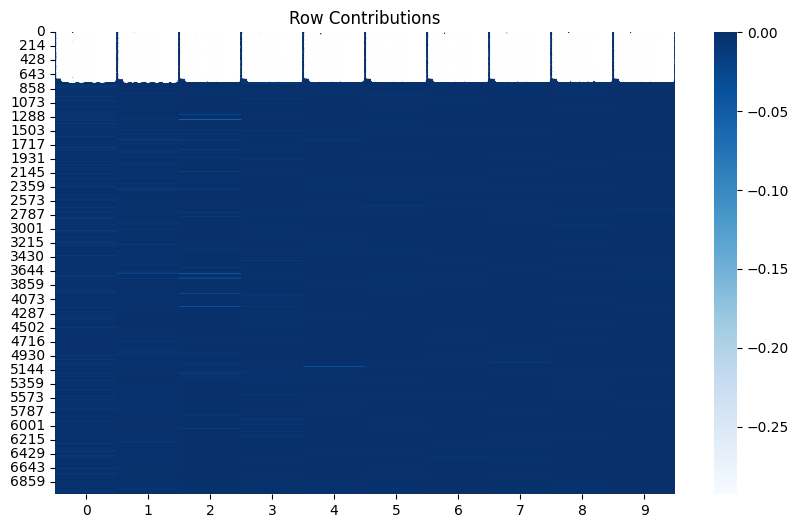

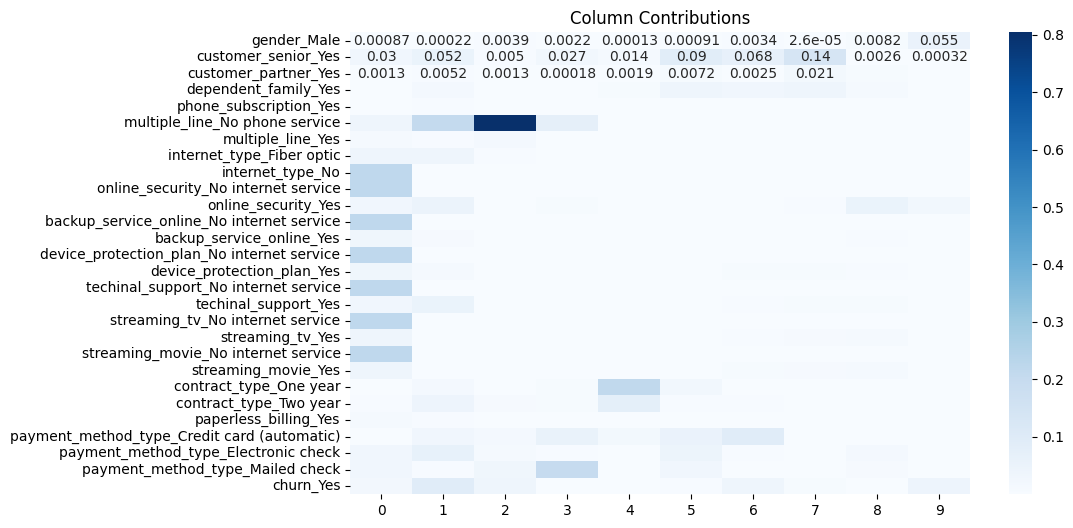

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot row contributions
plt.figure(figsize=(10, 6))
sns.heatmap(row_contrib, annot=True, cmap="Blues", cbar=True)
plt.title("Row Contributions")
plt.show()

# Plot column contributions
plt.figure(figsize=(10, 6))
sns.heatmap(column_contrib, annot=True, cmap="Blues", cbar=True)
plt.title("Column Contributions")
plt.show()

**Plot the Correspondence Analysis results**

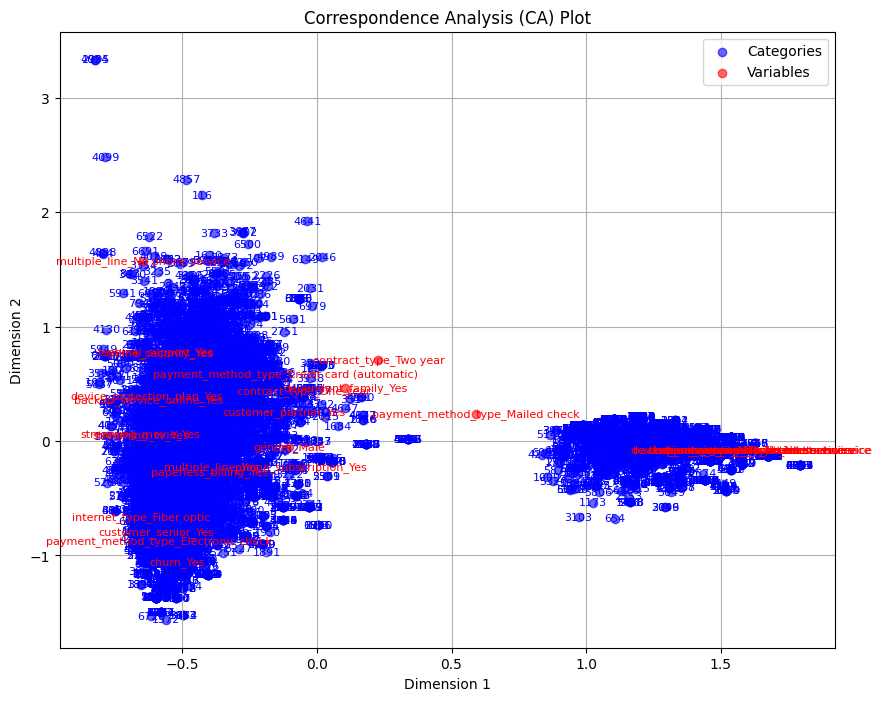

In [43]:
# Set up the figure
plt.figure(figsize=(10, 8))

# Plot row points (original categories)
plt.scatter(row_coords[0], row_coords[1], color='blue', label='Categories', alpha=0.6)
for i, (x, y) in enumerate(zip(row_coords[0], row_coords[1])):
    plt.text(x, y, df_encoded.index[i], ha='center', va='center', color='blue', fontsize=8)

# Plot column points (dummy variables)
plt.scatter(column_coords[0], column_coords[1], color='red', label='Variables', alpha=0.6)
for i, (x, y) in enumerate(zip(column_coords[0], column_coords[1])):
    plt.text(x, y, df_encoded.columns[i], ha='center', va='center', color='red', fontsize=8)

# Add labels and title
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Correspondence Analysis (CA) Plot')
plt.legend()
plt.grid(True)
plt.show()

**Choose the number of dimensions to keep**

In [58]:
# Access the eigenvalues (variance explained by each dimension)
eigenvalues = ca.eigenvalues_

# Print inertia for each dimension
print("Eigenvalues (inertia) for each dimension:", eigenvalues)

Eigenvalues (inertia) for each dimension: [0.61842947 0.21408138 0.16661622 0.12335132 0.10346146 0.10022713
 0.08888677 0.08393027 0.0767909  0.06453895]


In [60]:
# Calculate the proportion of inertia explained by each component
inertia_explained = eigenvalues / eigenvalues.sum() * 100

# Print the percentage of explained inertia for each dimension
print("Proportion of inertia explained by each dimension:", inertia_explained)

Proportion of inertia explained by each dimension: [37.7018986  13.05124458 10.15758149  7.51998276  6.30741839  6.1102412
  5.41888799  5.11671992  4.68147608  3.934549  ]


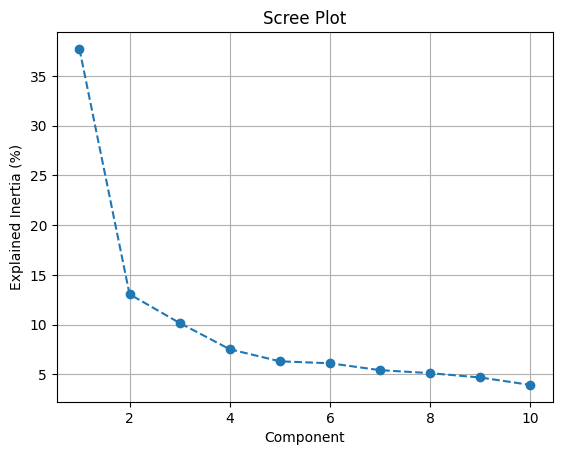

In [64]:
# Plot the explained inertia for each component (Scree plot)
plt.plot(range(1, len(inertia_explained) + 1), inertia_explained, marker='o', linestyle='--')
plt.xlabel("Component")
plt.ylabel("Explained Inertia (%)")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

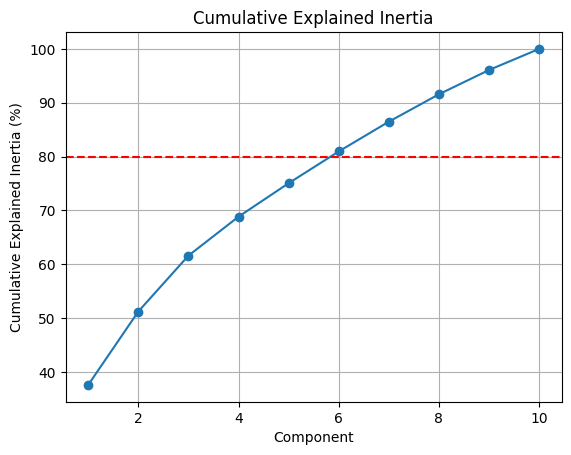

Number of components to retain (explaining 80% of variance): 5


In [63]:
# Plot the cumulative explained inertia
plt.plot(range(1, len(cumulative_inertia) + 1), cumulative_inertia, marker='o', linestyle='-')
plt.xlabel("Component")
plt.ylabel("Cumulative Explained Inertia (%)")
plt.title("Cumulative Explained Inertia")
plt.grid(True)
plt.axhline(y=80, color='r', linestyle='--')  # Add a horizontal line for 80% threshold
plt.show()

# Print the components that explain up to 80% of the inertia
threshold = 80
components_to_retain = (cumulative_inertia <= threshold).sum()
print(f"Number of components to retain (explaining {threshold}% of variance): {components_to_retain}")

In [65]:
# Compute squared contributions of the row and column coordinates
row_contrib = row_coords**2 / row_coords.sum().sum()
column_contrib = column_coords**2 / column_coords.sum().sum()

# Print row and column contributions
# print("Row contributions:\n", row_contrib)
print("Column contributions:\n", column_contrib)

Column contributions:
                                                     0         1         2  \
gender_Male                                  0.000871  0.000220  0.003908   
customer_senior_Yes                          0.029504  0.052190  0.005045   
customer_partner_Yes                         0.001282  0.005202  0.001318   
dependent_family_Yes                         0.000912  0.017817  0.000419   
phone_subscription_Yes                       0.000300  0.004227  0.002246   
multiple_line_No phone service               0.034730  0.205764  0.804063   
multiple_line_Yes                            0.012676  0.004295  0.016027   
internet_type_Fiber optic                    0.035211  0.036549  0.003808   
internet_type_No                             0.216725  0.000547  0.000010   
online_security_No internet service          0.216725  0.000547  0.000010   
online_security_Yes                          0.028476  0.048971  0.001533   
backup_service_online_No internet service    0.216725